In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [135]:
df = pd.read_csv(r"\Users\Bprit\Downloads\goodreads.csv")
df.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,tag_name,toread_count,currently_reading
0,1,2767052,2767052,2792775,272,439023483,9.780000e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m/2767052.jpg,https://images.gr-assets.com/books/1447303603s/2767052.jpg,"favorites, currentlyreading, youngadult, fiction, dystopian, toread, dystopia, fantasy, ya, sciencefiction, scifi, booksiown, series, owned, favourites, readin, romance, adventure, hungergames, bookclub",0,35418.0
1,2,3,3,4640799,491,439554934,9.780000e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m/3.jpg,https://images.gr-assets.com/books/1474154022s/3.jpg,"toread, favorites, fantasy, currentlyreading, youngadult, fiction, owned, harrypotter, booksiown, childrens, ya, series, favourites, reread, magic, readin, children, adventure, ownedbooks, jkrowling, classics",287,44640.0
2,3,41865,41865,3212258,226,316015849,9.780000e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m/41865.jpg,https://images.gr-assets.com/books/1361039443s/41865.jpg,"youngadult, fantasy, favorites, vampires, ya, fiction, toread, paranormal, booksiown, vampire, twilight, paranormalromance, supernatural, teen, urbanfantasy, ownedbooks, stepheniemeyer, reread, mybooks, favourites",0,240.0
3,4,2657,2657,3275794,487,61120081,9.780000e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m/2657.jpg,https://images.gr-assets.com/books/1361975680s/2657.jpg,"classics, favorites, toread, classic, historicalfiction, owned, school, clàssics, favourites, literature, youngadult, currentlyreading, bookclub, reread, readforschool, historical, novels, ownedbooks, alltimefavorites, readin",50,1997.0
4,5,4671,4671,245494,1356,743273567,9.780000e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m/4671.jpg,https://images.gr-assets.com/books/1490528560s/4671.jpg,"classics, favorites, fiction, classic, booksiown, owned, literature, school, historicalfiction, toread, romance, favourites, readin, bookclub, reread, novels, readforschool, americanliterature, ownedbooks, highschool",48,313.0


In [136]:
keep_genre = ['history', 'sciencefiction', 'comics', 'nonfiction', 'fantasy', 'mystery', 'biography', 'fiction', 'historicalfiction', 
               'romance', 'classics', 'dystopia', 'contemporaryromance', 'finance', 
               'adventure', 'youngadult', 'fairytales', 'paranormalfantasy', 'business', 'science',  
               'politics', 'cookbooks', 'contemporaryfiction', 'personaldevelopment', 'mentalhealth', 
              'horror', 'instructional', 'shortstories', 'sports', 'poetry', 'childrensbooks', 'theater', 'scififantasy']

print(keep_genre)

['history', 'sciencefiction', 'comics', 'nonfiction', 'fantasy', 'mystery', 'biography', 'fiction', 'historicalfiction', 'romance', 'classics', 'dystopia', 'contemporaryromance', 'finance', 'adventure', 'youngadult', 'fairytales', 'paranormalfantasy', 'business', 'science', 'politics', 'cookbooks', 'contemporaryfiction', 'personaldevelopment', 'mentalhealth', 'horror', 'instructional', 'shortstories', 'sports', 'poetry', 'childrensbooks', 'theater', 'scififantasy']


In [137]:
#rows with Arabic books that I don't care about. There's also some rows with Persian poetry

condition_arabic = df['tag_name'].str.contains('arabic')

arab_index = df[condition_arabic].index
list_arab = arab_index.tolist()
#len(list_arab)

In [138]:
df['tag_name'] = df['tag_name'].str.replace('clÃ ssics', 'classics').str.replace('historicalromance', 'romance').str.replace('worldhistory', 'history').str.replace('psychology', 'mentalhealth').str.replace('realisticfiction', 'contemporaryfiction').str.replace('mysterythriller', 'mystery').str.replace('disney', 'childrensbooks').str.replace('childhoodbooks', 'childrensbooks').str.replace('autobiography', 'biography').str.replace('memoir', 'biography').str.replace('magicrealism', 'fantasy').str.replace('religion', 'personaldevelopment').str.replace('christian', 'personaldevelopment')

#df['tag_name']

In [139]:
df['Full List'] = df['tag_name'].str.split(',')

In [140]:
def removeList(b):       #passing in b into my functiom, where b is a list
    newlist = [i.strip() for i in b]   #strips all white spaces of my words in the list (there were many of them)
    #print(newlist)
    keep_words = [word for word in newlist for i in keep_genre if i == word]
    #print(keep_words)
    keep_words = list(set(keep_words))    #first it casts my list into a set to remove all duplicate elements, then it converts the set back to a list
    
    return keep_words
    

    
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)   
df['Smaller List'] = df['Full List'].apply(removeList)
#df.head()
#df['Smaller List']





In [141]:
def cleanCurrlist(keep_words):   #pass in keep_words which is a list
    
    
    #Let's edit our list by each genre that is inside:
    
    #Case 1: biographies are always nonfiction, they cannot be historical fiction or fiction, and they are not history books or business books or adventure
    
    if 'biography' in keep_words and 'fiction' in keep_words:
        keep_words.remove('fiction')
    elif 'biography' in keep_words and 'historicalfiction' in keep_words:
        keep_words.remove('historicalfiction')
    elif 'biography' in keep_words and 'history' in keep_words:
        keep_words.remove('history')
    elif 'biography' in keep_words and 'romance' in keep_words:
        keep_words.remove('romance')
    elif 'biography' in keep_words and 'adventure' in keep_words:
        keep_words.remove('adventure')
    elif 'biography' in keep_words and 'business' in keep_words:
        keep_words.remove('business')
    elif 'biography' in keep_words and 'finance' in keep_words:
        keep_words.remove('finance')
    elif 'biography' in keep_words and 'mentalhealth' in keep_words:
        keep_words.remove('mentalhealth')
    elif 'biography' in keep_words and 'contemporaryfiction' in keep_words:
        keep_words.remove('contemporaryfiction') 
        
    # Case 2: historical fiction books are not history books and are not non-fiction
    elif 'historicalfiction' in keep_words and 'fiction' in keep_words and 'nonfiction' in keep_words and 'history' in keep_words:
        keep_words.remove('history')
        keep_words.remove('nonfiction')
    elif 'historicalfiction' in keep_words and 'fiction' in keep_words and 'history' in keep_words:
        keep_words.remove('history')
    elif 'historicalfiction' in keep_words and 'sciencefiction' in keep_words and 'adventure' in keep_words:
        keep_words.remove('adventure')
        
    # Case 3: history books are always non fiction
    elif 'historicalfiction' in keep_words and 'nonfiction' in keep_words and 'history' in keep_words:
        keep_words.remove('historicalfiction')
    elif 'fiction' in keep_words and 'nonfiction' in keep_words and 'history' in keep_words:
        keep_words.append('historicalfiction')
        keep_words.remove('nonfiction')
        keep_words.remove('history')
    
    #Case 4: dystopia books
    
    elif 'dystopia' in keep_words and 'fantasy' in keep_words:
        keep_words.remove('fantasy')
    
    elif 'dystopia' in keep_words and 'scififantasy' in keep_words and 'sciencefiction' in keep_words:
        keep_words.remove('scififantasy')
        keep_words.remove('sciencefiction')
    
    elif 'dystopia' in keep_words and 'horror' in keep_words and 'fantasy' in keep_words:
        keep_words.remove('horror')
        keep_words.remove('fantasy')
     
    elif 'dystopia' in keep_words and 'horror' in keep_words:
        keep_words.remove('horror')
        
         
    # Case 5: Comics are just comics 
    elif 'comics' in keep_words and 'fairytales' in keep_words:
        keep_words.remove('fairytales')
    elif 'comics' in keep_words and 'historicalfiction' in keep_words:
        keep_words.remove('historicalfiction')
    elif 'comics' in keep_words and 'history' in keep_words:
        keep_words.remove('history')
    elif 'comics' in keep_words and 'romance' in keep_words:
        keep_words.remove('romance')
    elif 'comics' in keep_words and 'adventure' in keep_words:
        keep_words.remove('adventure')
    elif 'comics' in keep_words and 'business' in keep_words:
        keep_words.remove('business')
    elif 'comics' in keep_words and 'finance' in keep_words:
        keep_words.remove('finance')
    elif 'comics' in keep_words and 'mentalhealth' in keep_words:
        keep_words.remove('mentalhealth')
    elif 'comics' in keep_words and 'contemporaryfiction' in keep_words:
        keep_words.remove('contemporaryfiction')    
    elif 'comics' in keep_words and 'fantasy' in keep_words:
        keep_words.remove('fantasy')   
    elif 'comics' in keep_words and 'sciencefiction' in keep_words:
        keep_words.remove('sciencefiction')
    
    
    # Case 6: finance books are personal finance or business related books
    elif 'finance' in keep_words and 'personaldevelopment' in keep_words:
        keep_words.remove('personaldevelopment')
    elif 'finance' in keep_words and 'business' in keep_words:
        keep_words.remove('business')
    elif 'finance' in keep_words and 'mentalhealth' in keep_words:
        keep_words.remove('mentalhealth')
    
    #Case 7: Fantasy books
    elif 'paranormalfantasy' in keep_words and 'fantasy' in keep_words and 'scififantasy' in keep_words and 'sciencefiction' in keep_words:
        keep_words.remove('paranormalfantasy')
        keep_words.remove('scififantasy')
        
    elif 'paranormalfantasy' in keep_words and 'fantasy' in keep_words and 'scififantasy' in keep_words:
        keep_words.remove('paranormalfantasy')
        keep_words.remove('scififantasy')
    
    elif 'fantasy' in keep_words and 'scififantasy' in keep_words and 'sciencefiction' in keep_words:
        keep_words.remove('scififantasy')
        
    elif 'fantasy' in keep_words and 'childrensbooks' in keep_words and 'fairytales' in keep_words and 'youngadult' in keep_words:
        keep_words.remove('fairytales')
        keep_words.remove('fantasy')
        keep_words.remove('youngadult')
        
    elif 'fantasy' in keep_words and 'youngadult' in keep_words and 'fairytales' in keep_words:
        keep_words.remove('fairytales')
        keep_words.remove('youngadult')
        
    elif 'fantasy' in keep_words and 'childrensbooks' in keep_words and 'fairytales' in keep_words:
        keep_words.remove('fairytales')
        keep_words.remove('fantasy')
    
    #Case 8: childrensbooks and fairytales:
    elif 'fantasy' in keep_words and 'paranormalfantasy' in keep_words:
        keep_words.remove('paranormalfantasy')
        
    #Case 9: childrensbooks and fairytales:
    elif 'childrensbooks' in keep_words and 'fairytales' in keep_words:
        keep_words.remove('fairytales')
    elif 'fairytales' in keep_words and 'fantasy' in keep_words and 'paranormalfantasy' in keep_words:
        keep_words.remove('fairytales')
        keep_words.remove('paranormalfantasy')
    elif 'fairytales' in keep_words and 'fantasy' in keep_words:
        keep_words.remove('fairytales')
#     elif 'fantasy' in keep_words and 'childrensbooks' in keep_words:
#         keep_words.remove('childrensbooks')
    elif 'fairytales' in keep_words:
        keep_words.append('childrensbooks')
        keep_words.remove('fairytales')
        
    #Case 10: romance vs contemporary works
    elif 'romance' in keep_words and 'contemporaryromance' in keep_words and 'contemporaryfiction' in keep_words:
        keep_words.remove('contemporaryromance')
    elif 'romance' in keep_words and 'contemporaryromance' in keep_words:  
        keep_words.remove('contemporaryromance')
    
    #Lastly Case 11: Personal development and mental health
    elif 'personaldevelopment' in keep_words and 'mentalhealth' in keep_words and 'science' in keep_words:
        keep_words.remove('mentalhealth')
    elif 'personaldevelopment' in keep_words and 'mentalhealth' in keep_words:
        keep_words.remove('mentalhealth')
    
        
    
#     try:
#         genre = ", ".join(keep_words)
        
#         if len(genre.strip()) == 0:
#             genre = 'Nothing'
#         #print(genre)
#     except:
#         genre = "Nothing"
        
    return keep_words

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)   
df['Smaller List'] = df['Smaller List'].apply(cleanCurrlist)
#df['New Genre']

In [142]:
def houseKeeping(y_list):   #pass in y_list which is a list
    
    if 'business' in y_list and 'finance' not in y_list:
        y_list.append('finance')
        y_list.remove('business')
    elif 'scififantasy' in y_list and 'science' in y_list:
        y_list.append('sciencefiction')
        y_list.remove('science')
    elif 'mentalhealth' in y_list and 'personaldevelopment' not in y_list:
        y_list.append('personaldevelopment')
        y_list.remove('mentalhealth')
    elif 'paranormalfantasy' in y_list and 'fantasy' not in y_list:
        y_list.append('fantasy')
        y_list.remove('paranormalfantasy')
#     elif 'youngadult' in y_list:
#         y_list.remove('youngadult')
    elif 'scififantasy' in y_list and 'fantasy' in y_list:
        y_list.remove('scififantasy')
    elif 'scififantasy' in y_list and 'fantasy' not in y_list:
        y_list.append('fantasy')
        y_list.remove('scififantasy')
    elif 'scififantasy' in y_list and 'dystopia' in y_list:
        y_list.remove('scififantasy')
    elif 'fiction' in y_list and 'nonfiction' in y_list:
        y_list.remove('nonfiction')
    elif 'contemporaryromance' in y_list and 'romance' not in y_list and 'contemporaryfiction' not in y_list:
        y_list.append('contemporaryfiction')
        y_list.append('romance')
        y_list.remove('contemporaryromance') 
    elif 'biography' in y_list and 'contemporaryfiction' in y_list:
        y_list.remove('contemporaryfiction')
    elif 'comics' in y_list and 'fantasy' in y_list:
        y_list.remove('fantasy')
    elif 'comics' in y_list and 'romance' in y_list:
        y_list.remove('romance')
    elif 'comics' in y_list and 'sciencefiction' in y_list:
        y_list.remove('sciencefiction')
    elif 'comics' in y_list and 'horror' in y_list:
        y_list.remove('horror')
    
    y_list = list(set(y_list))
    
    return y_list


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)   
df['Genres'] = df['Smaller List'].apply(houseKeeping)
#df['Genres']    

In [143]:
#df.head(30)

In [144]:
# Group books by fiction and nonfiction

def fictORnot(z):  #where z is a list
    result = ''
    if 'fiction' in z:
        result = 'fiction'
    elif 'nonfiction' in z or 'biography' in z or 'instructional' in z:
        result = 'Nonfiction'
    elif 'dystopia' in z:
        result = 'fiction'
    elif 'contemporaryfiction' in z and 'romance' in z:
        result = 'fiction'
    elif 'classics' in z and 'romance' in z:
        result = 'fiction'
    elif 'romance' in z and 'nonfiction' not in z:
        result = 'fiction'
    elif 'fantasy' in z:
        result = 'fiction'
    elif 'historicalfiction' in z or 'comics' in z:
        result = 'fiction'
    elif 'fiction' in z and 'fantasy' in z:
        result = 'fiction'
    elif 'mystery' in z and 'nonfiction' not in z:
        result = 'fiction' 
    elif 'theater' in z:
        result = 'fiction'
    else:
        result = 'nope'
            
    return result
        
    

df['Fiction or Nonfiction'] = df['Genres'].apply(fictORnot)


print(df.groupby('Fiction or Nonfiction')['Fiction or Nonfiction'].count())

condition_no = df['Fiction or Nonfiction'] == 'nope'
#df[condition_no]

Fiction or Nonfiction
Nonfiction    1565
fiction       8308
nope            73
Name: Fiction or Nonfiction, dtype: int64


In [145]:
df[['title', 'Genres', 'Fiction or Nonfiction']].iloc[:10]

,title,Genres,Fiction or Nonfiction
0,"The Hunger Games (The Hunger Games, #1)","[adventure, romance, fiction, dystopia, sciencefiction, youngadult]",fiction
1,"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)","[adventure, fiction, fantasy, youngadult, classics]",fiction
2,"Twilight (Twilight, #1)","[fiction, youngadult, fantasy]",fiction
3,To Kill a Mockingbird,"[youngadult, classics, historicalfiction]",fiction
4,The Great Gatsby,"[fiction, classics, historicalfiction, romance]",fiction
5,The Fault in Our Stars,"[fiction, youngadult, contemporaryfiction, romance]",fiction
6,The Hobbit,"[adventure, fiction, fantasy, youngadult, classics]",fiction
7,The Catcher in the Rye,"[fiction, youngadult, classics]",fiction
8,"Angels & Demons (Robert Langdon, #1)","[fiction, adventure, mystery, historicalfiction]",fiction
9,Pride and Prejudice,"[fiction, romance, classics, historicalfiction]",fiction


In [146]:
# 1. Create column Classics or not?
# 2. put yes or no if the book has the tag classic

df['Classic or No'] = ['Yes is Classic' if 'classics' in row else 'No not Classic' for row in df['Genres']]

df[['title', 'Genres', 'Fiction or Nonfiction', 'Classic or No']].iloc[:50]

#print(df.groupby('Classic or No')['Classic or No'].count())

,title,Genres,Fiction or Nonfiction,Classic or No
0,"The Hunger Games (The Hunger Games, #1)","[adventure, romance, fiction, dystopia, sciencefiction, youngadult]",fiction,No not Classic
1,"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)","[adventure, fiction, fantasy, youngadult, classics]",fiction,Yes is Classic
2,"Twilight (Twilight, #1)","[fiction, youngadult, fantasy]",fiction,No not Classic
3,To Kill a Mockingbird,"[youngadult, classics, historicalfiction]",fiction,Yes is Classic
4,The Great Gatsby,"[fiction, classics, historicalfiction, romance]",fiction,Yes is Classic
5,The Fault in Our Stars,"[fiction, youngadult, contemporaryfiction, romance]",fiction,No not Classic
6,The Hobbit,"[adventure, fiction, fantasy, youngadult, classics]",fiction,Yes is Classic
7,The Catcher in the Rye,"[fiction, youngadult, classics]",fiction,Yes is Classic
8,"Angels & Demons (Robert Langdon, #1)","[fiction, adventure, mystery, historicalfiction]",fiction,No not Classic
9,Pride and Prejudice,"[fiction, romance, classics, historicalfiction]",fiction,Yes is Classic


In [147]:
# Number of Classic Novels:

print(df.groupby('Classic or No')['Classic or No'].count())

Classic or No
No not Classic    8228
Yes is Classic    1718
Name: Classic or No, dtype: int64


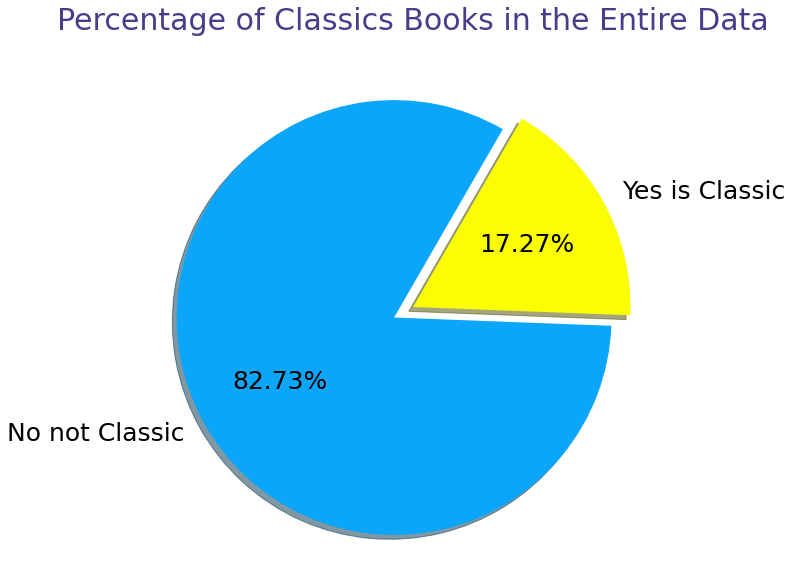

In [148]:
# plot the percent of classic novels in the whole data set

classic = df.groupby('Classic or No')['Classic or No'].count()   #this is a series
classic_df = classic.to_frame()   #I cast the series into a dataframe 
#classic_df

data = classic_df['Classic or No']
labels = classic_df.index

c = ["#0BA6F9","#FAFE00"]  #these are just the list of colors that I picked :) blue, yellow, violet, pink, and red
e = [0.1, 0]  # e works like this: If e is not *None*, it is a len(x) array which specifies the fraction 
                        #of the radius with which to offset, or separate from each wedge.

plt.figure(figsize=(12,10))   # Gives Width, height in inches
plt.pie(data, labels=labels, colors=c, autopct = '%.2f%%', explode=e, shadow = True, startangle = 60,  textprops={'fontsize': 25})
plt.title("Percentage of Classics Books in the Entire Data", fontsize = 30, color = 'darkslateblue')
plt.savefig("Percentage of Classics Books in the entire Data.jpg")


In [161]:
# 3. drop the words fiction and nonfiction and classics from the column True Genres

def dropWords(w):    #w is a list
    if 'fiction' in w:
        w.remove('fiction')
    elif 'nonfiction' in w:
        w.remove('nonfiction')
    elif 'classics' in w:
        w.remove('classics')
    elif 'youngadult' in w:
        w.remove('youngadult')
    return w
    
        
df['Genres'] = df['Genres'].apply(dropWords)
    

In [162]:
type(df[['title', 'average_rating']])

pandas.core.frame.DataFrame

In [163]:
# 4. Find the 500 highest rated books on average? 

max_ratingdf = df[['title', 'Genres','Classic or No', 'average_rating']].sort_values(by = 'average_rating', ascending = False)
max_ratingdf = max_ratingdf.head(500)
#max_ratingdf.reset_index()

#max_ratingdf

# THIS IS MY DF OF THE TOP 500 RATED BOOKS

In [164]:
# let's get the top 500 

# I CREATE THE NEW DF HERE USING THE EXPLODE FUNCTION OF THE TOP 500 RATED BOOKS
# Then I find how many of the 500 books fall into each genre category

new_max_df = max_ratingdf.explode("Genres")
new_max_series = new_max_df.groupby('Genres')['title'].count() 
new_max_series

Genres
adventure               64
biography               32
business                 1
childrensbooks          44
comics                  79
contemporaryfiction      7
cookbooks                1
dystopia                16
fantasy                224
finance                  1
historicalfiction       48
history                 13
horror                  23
mystery                 59
personaldevelopment     48
poetry                  14
politics                11
romance                161
science                  4
sciencefiction          31
scififantasy             1
shortstories            29
sports                   5
theater                  1
Name: title, dtype: int64

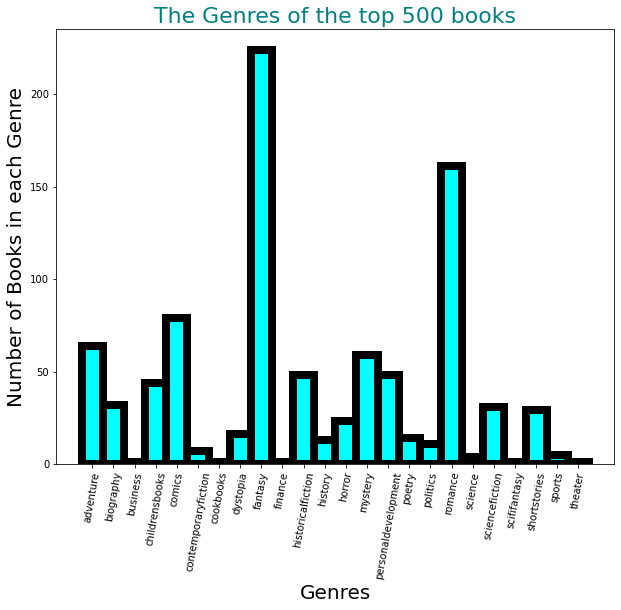

In [165]:
#Plot top 500 rated books in a bar chart:

max_rate = new_max_series.to_frame() 

max_rate = max_rate.rename(columns = {'title':'Count'})

#max_rate['Count']

plt.figure(figsize = (10,8))
x = max_rate.index
height = max_rate['Count']
#color = max_rate['Count']


plt.title("The Genres of the top 500 books", fontsize = 22, color = "teal");
plt.ylabel('Number of Books in each Genre', fontsize = 20)
plt.xlabel('Genres', fontsize = 20)
plt.bar(x, height, width = 1, color = 'cyan', edgecolor = "black", linewidth = 8)
plt.xticks(rotation = '80');
plt.savefig("The Genres of the top 500 books.jpg")

In [166]:
# Find out how many of the top 500 books are classics
 
num_classics = max_ratingdf.groupby('Classic or No').count()['title']  
num_classics

Classic or No
No not Classic    413
Yes is Classic     87
Name: title, dtype: int64

In [167]:
num_classics = num_classics.to_frame()   #I cast the series into a dataframe 
#num_classics


num_classics = num_classics.rename(columns = {'title':'Count'})
# num_classics


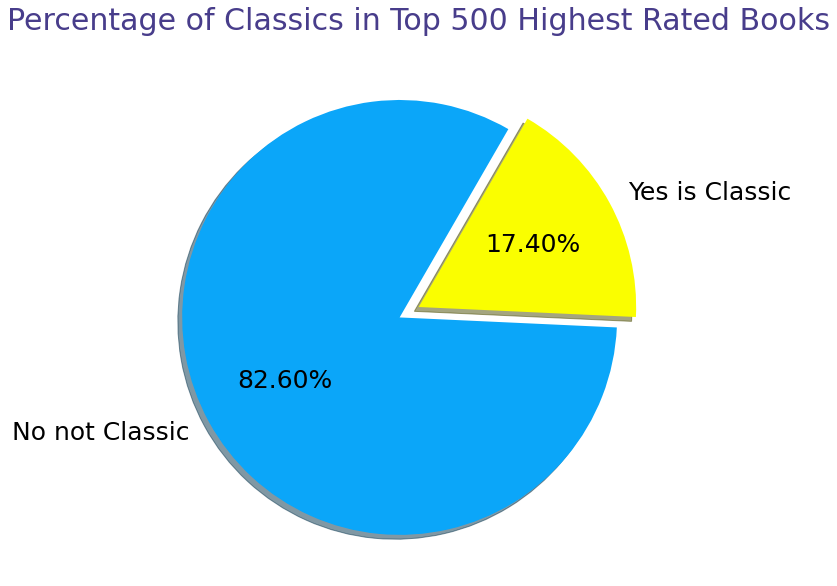

In [168]:
# 4.continued: # Find what percent of these 500 books are classics? 
# Plot the classics vs non classics percent in a pie chart.

data = num_classics['Count']
labels = num_classics.index

c = ["#0BA6F9","#FAFE00"]  
e = [0.1, 0]  

plt.figure(figsize=(12,10))   # Gives Width, height of graph in inches
plt.pie(data, labels = labels, colors=c, autopct = '%.2f%%', explode=e, shadow = True, startangle = 60, textprops={'fontsize': 25})
plt.title("Percentage of Classics in Top 500 Highest Rated Books", fontsize = 30, color = 'darkslateblue')
plt.savefig("Percentage of Classics in Top 500 Highest Rated Books.jpg")

In [84]:
# 5. Find the average rating for classics and non classics books in the entire dataset

mean_rate_classics = df.groupby('Classic or No')['average_rating'].mean().round(2)
mean_rate_classics

Classic or No
No not Classic    3.99
Yes is Classic    4.02
Name: average_rating, dtype: float64

In [85]:
mean_rate_classics = mean_rate_classics.to_frame()
mean_rate_classics

,average_rating
Classic or No,
No not Classic,3.99
Yes is Classic,4.02


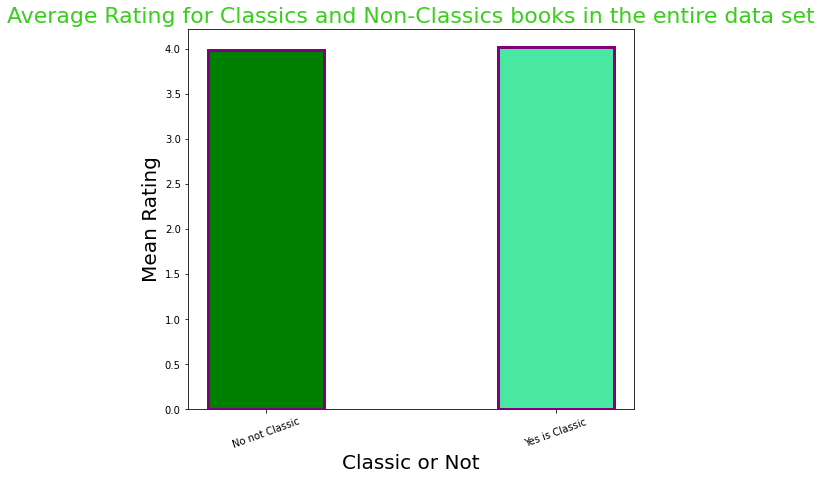

In [86]:
#5. continued: Plot the mean rating of classics vs non classics books in a bar chart

plt.figure(figsize = (8,7))
x = mean_rate_classics.index
height = mean_rate_classics['average_rating']
#color = mean_rate_classics['Count']


plt.title("Average Rating for Classics and Non-Classics books in the entire data set", fontsize = 22, color = "#37CF18");
plt.ylabel('Mean Rating', fontsize = 20)
plt.xlabel('Classic or Not', fontsize = 20)
plt.bar(x, height, width = 0.4, color = ['green', '#4AE7A2'], edgecolor = "purple", linewidth = 3)
plt.xticks(rotation = '20');

In [87]:
# 6. From the top 500 novels, find out how many times a classics novel shows up in each genre
# plot the results in a bar graph (which genre has the most classics books)
# use a condition for a dataframe that only has classics books

condition_classic_genre = new_max_df['Classic or No'] == 'Yes is Classic'
num_genre_classic = new_max_df[condition_classic_genre].groupby('Genres')['title'].count()
#num_genre_classic

In [88]:
num_genre_classic = num_genre_classic.to_frame()   #I cast the series into a dataframe 
#num_genre_classic

In [89]:
num_genre_classic = num_genre_classic.rename(columns = {'title':'Count'})
num_genre_classic

,Count
Genres,
adventure,19
biography,7
childrensbooks,16
comics,1
fantasy,28
historicalfiction,18
history,3
horror,5
mystery,10


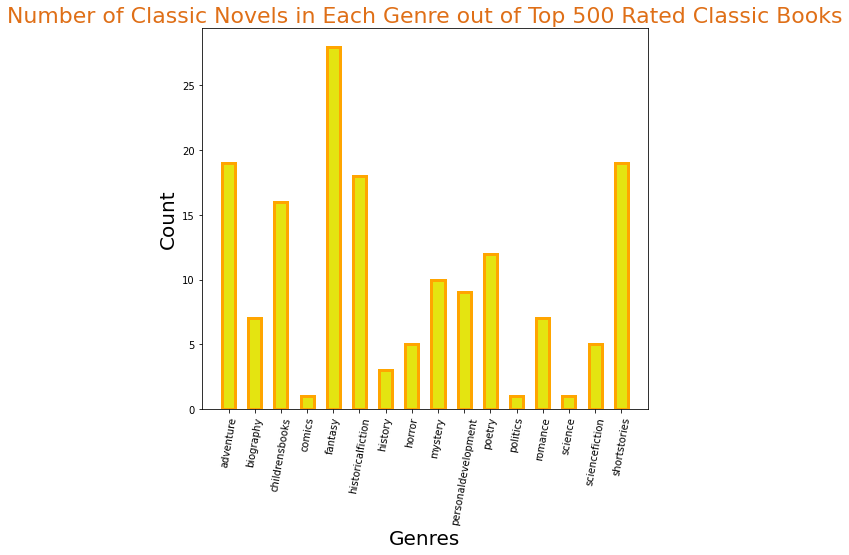

In [90]:
plt.figure(figsize = (8,7))
x = num_genre_classic.index
height = num_genre_classic['Count']
#color = mean_rate_classics['Count']


plt.title("Number of Classic Novels in Each Genre out of Top 500 Rated Classic Books", fontsize = 22, color = "#DF6F17");
plt.ylabel('Count', fontsize = 20)
plt.xlabel('Genres', fontsize = 20)
plt.bar(x, height, width = 0.5, color = '#E4E411', edgecolor = "orange", linewidth = 3)
plt.xticks(rotation = '80');

In [91]:
num_pie_sort = num_genre_classic.sort_values(by = ['Count'], ascending = False).iloc[:10]
num_pie_sort

,Count
Genres,
fantasy,28
adventure,19
shortstories,19
historicalfiction,18
childrensbooks,16
poetry,12
mystery,10
personaldevelopment,9
biography,7


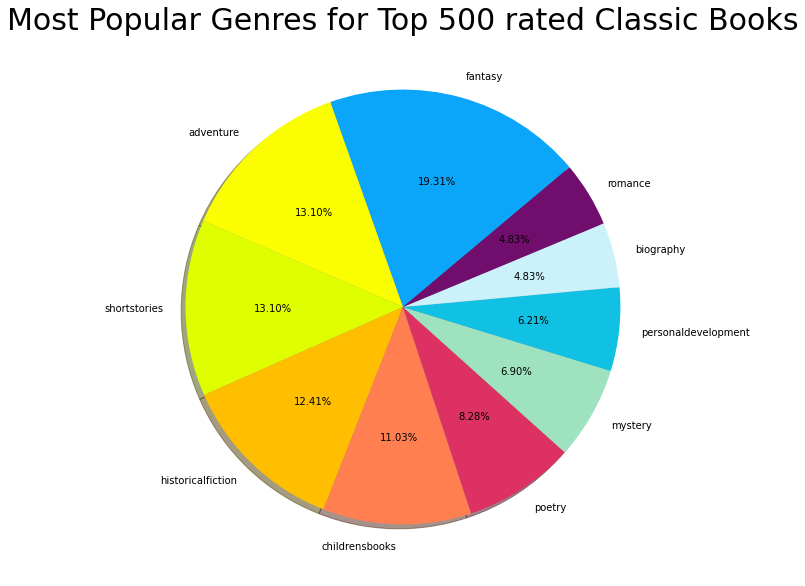

In [92]:
data = num_pie_sort['Count']
labels = num_pie_sort.index

c = ["#0BA6F9","#FAFE00","#DFFF00","#FFBF00","#FF7F50","#DE3163","#9FE2BF", "#11C1E4", "#CBF2FA", "#710E6D"]  
#e = [0.1, 0]  

plt.figure(figsize=(12,10))   # Gives width, height of graph in inches
plt.pie(data, labels = labels, colors=c, autopct = '%.2f%%', shadow = True, startangle = 40);
plt.title("Most Popular Genres for Top 500 rated Classic Books", fontsize = 30, color = 'Black');
plt.savefig("Most Popular Genres for Top 500 rated Classic Books.jpg")

In [93]:
#6. continued: Check what genre has the highest rated books in general ? Plot all the averages of the 
# rated genres in a bar chart (use explode)

genredf = df.explode("Genres")

genre_mean_highest = genredf.groupby('Genres')['average_rating'].mean().round(2)

genre_mean_highest = genre_mean_highest.to_frame() 

In [94]:
genre_mean_highest = genre_mean_highest.sort_values(by = ['average_rating'], ascending = False)
genre_mean_highest

,average_rating
Genres,
comics,4.22
childrensbooks,4.10
poetry,4.10
business,4.09
sports,4.06
fantasy,4.06
personaldevelopment,4.05
adventure,4.05
cookbooks,4.04


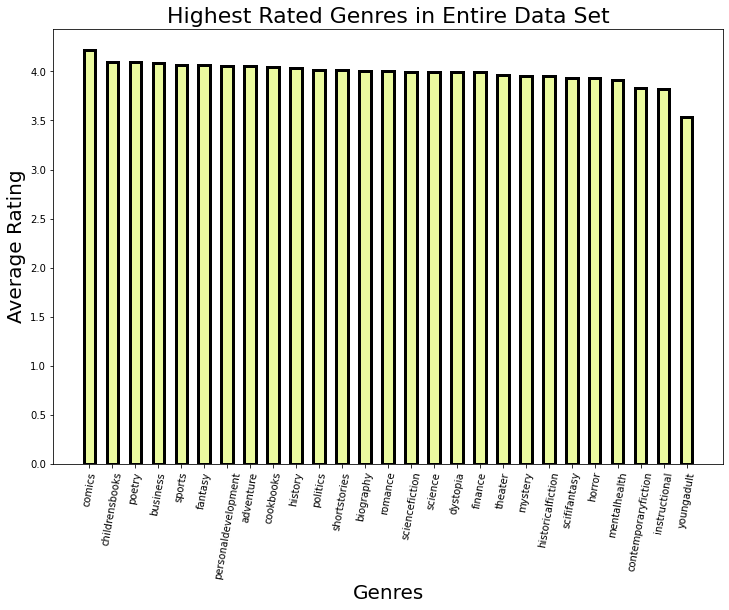

In [95]:
plt.figure(figsize = (12,8))
x = genre_mean_highest.index
height = genre_mean_highest['average_rating']

plt.title("Highest Rated Genres in Entire Data Set", fontsize = 22, color = 'black');
plt.ylabel('Average Rating', fontsize = 20, color = 'black')
plt.xlabel('Genres', fontsize = 20, color = 'black')
plt.bar(x, height, width = 0.5, color = '#EBFA9F', edgecolor = "black", linewidth = 3)
plt.xticks(rotation = '80');

In [96]:
# How many comic books are in my dataset?

num_comics = genredf['Genres'] == 'comics'
print(genredf[num_comics]['Genres'].count())

#How many fantasy novels are in my dataset?

num_fantasy = genredf['Genres'] == 'fantasy'
print(genredf[num_fantasy]['Genres'].count())

367
2880


In [97]:
num_each_genre = genredf.groupby('Genres')['Genres'].count().sort_values(ascending = False)
num_each_genre

Genres
fantasy                2880
romance                2792
mystery                2144
historicalfiction      1535
adventure              1194
sciencefiction         1044
contemporaryfiction    1028
biography               829
childrensbooks          826
personaldevelopment     737
horror                  632
shortstories            383
dystopia                368
comics                  367
science                 342
history                 328
politics                254
finance                 220
poetry                  207
sports                  101
cookbooks                72
theater                  53
scififantasy             44
mentalhealth             38
business                 24
instructional             3
youngadult                1
Name: Genres, dtype: int64

In [130]:
# 7. Check what year was the most recent classics novel

# df['original_publication_year'].dtype
df['original_publication_year'].isna().sum()
df["original_publication_year"] = df["original_publication_year"].fillna(0.0) 

df['original_publication_year'] = df['original_publication_year'].astype(int)
#df['original_publication_year'].dtype
#df['original_publication_year'].isna().sum()


new_classic = df['Classic or No'] == 'Yes is Classic'
classic_years = df[new_classic][['title', 'original_publication_year']].sort_values(by = ['original_publication_year'], ascending = False)
classic_years.head()
# my dataframe for years of publication for classic books is called classic_years

,title,original_publication_year
530,Go Set a Watchman,2015
9424,Manga Classics: Les Misérables,2014
6904,"Sense & Sensibility (The Austen Project, #1)",2013
4496,Fairy Tales from the Brothers Grimm: A New English Version,2012
8334,A Wrinkle in Time: The Graphic Novel,2012


In [131]:
# 8. Create a new column of classics books that checks the date column, and sees how many classics books were released
# between 1970 to present, and before 1970 ( a classics novel should be one that can last supposedly 50 years)
# groupby whether if the book is a modern classic or old classic and count how mnay in each category 

classic_years['Modern vs Old Classic'] = ['Modern Classic' if year >= 1970 else 'Old Classic' for year in classic_years['original_publication_year'] ]
#classic_years.head()

classic_years.groupby('Modern vs Old Classic')['original_publication_year'].count()


Modern vs Old Classic
Modern Classic     527
Old Classic       1130
Name: original_publication_year, dtype: int64

In [132]:
# Use the function loc to create groups of years for years of publication
# then groupby each category of years of publication and count how many books were relased in each category 
# then plot the data into a scatter plot with a line, and see if there is correlation between the years of publication
# and if the book is a classic or not

#Note that negative years of publication mean B.C.E. Books such as the Epic of Gilgamesh and the Iliad
#Note: you must use the symbol & when you want to say this "and" this. The df.loc function does not recognize 
# the word "and". You also must use parenthesis to separate the "and" components

classic_years.loc[classic_years["original_publication_year"] >= 2010, "Type of Classic"] = "2010-Present"
classic_years.loc[(classic_years["original_publication_year"] >= 1990) & (classic_years["original_publication_year"] < 2010), "Type of Classic"] = "1990-2009"
classic_years.loc[(classic_years["original_publication_year"] >= 1970) & (classic_years["original_publication_year"] < 1990), "Type of Classic"] = "1970-1989"                      
classic_years.loc[(classic_years["original_publication_year"] >= 1940) & (classic_years["original_publication_year"] < 1970), "Type of Classic"] = "1940-1969" 
#classic_years.loc[(classic_years["original_publication_year"] >= 1910) & (classic_years["original_publication_year"] < 1940), "Type of Classic"] = "1910-1939"     
#classic_years.loc[(classic_years["original_publication_year"] >= 1910) & (classic_years["original_publication_year"] < 1930), "Type of Classic"] = "1910-1929" 
classic_years.loc[classic_years["original_publication_year"] < 1940, "Type of Classic"] = "1939 and before" 

#classic_years



#classic_years.groupby('original_publication_year')['original_publication_year'].count()




In [133]:
type_of_classic = classic_years.groupby('Type of Classic')['Type of Classic'].count()
type_of_classic


Type of Classic
1939 and before    612
1940-1969          518
1970-1989          366
1990-2009          152
2010-Present         9
Name: Type of Classic, dtype: int64

In [102]:
type_of_classic = type_of_classic.to_frame() 

In [103]:
type_of_classic =  type_of_classic.rename(columns = {'Type of Classic':'Count'})
type_of_classic['Type of Classic'] = type_of_classic.index


In [104]:
#type_of_classic
type_of_classic.reset_index(drop = True, inplace = True)

In [105]:
type_of_classic

,Count,Type of Classic
0,612,1939 and before
1,518,1940-1969
2,366,1970-1989
3,152,1990-2009
4,9,2010-Present


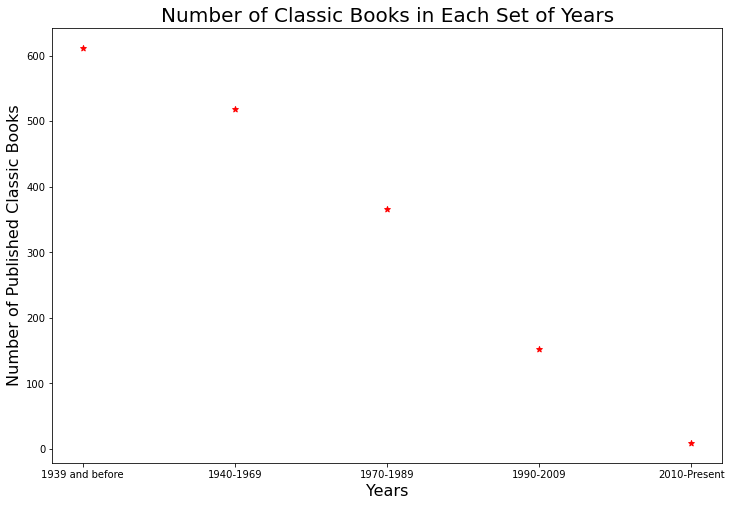

In [106]:
plt.figure(figsize=(12,8));  #size of graph in inches
plt.scatter(type_of_classic['Type of Classic'], type_of_classic['Count'], color = 'red', marker = '*')
#plt.plot(type_of_classic.index, type_of_classic, linewidth = 0.8);
plt.title('Number of Classic Books in Each Set of Years', fontsize=20);
plt.xlabel('Years', fontsize=16);
plt.ylabel('Number of Published Classic Books', fontsize=16);

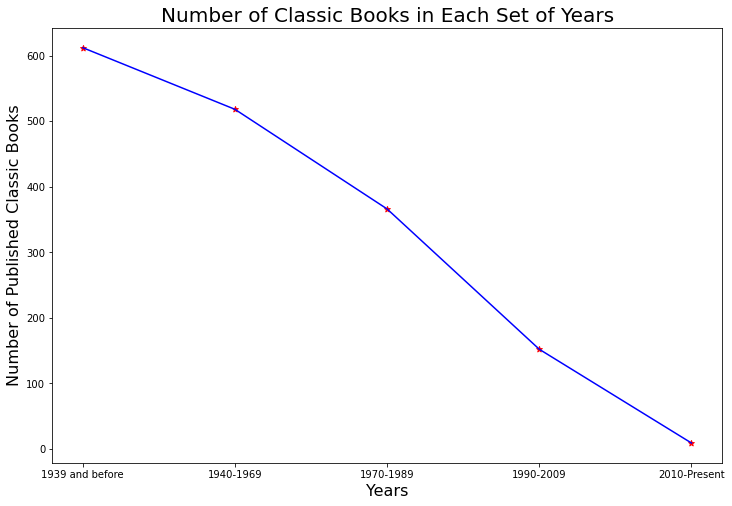

In [107]:
plt.figure(figsize=(12,8));  #size of graph in inches
plt.scatter(type_of_classic['Type of Classic'], type_of_classic['Count'], color = 'red', marker = '*')
plt.title('Number of Classic Books in Each Set of Years', fontsize=20);
plt.xlabel('Years', fontsize=16);
plt.ylabel('Number of Published Classic Books', fontsize=16);
plt.plot(type_of_classic['Type of Classic'], type_of_classic['Count'], c = 'blue');

In [108]:
#9. Find out which genre has the most classics novels in the entire dataset

classic_cond = df['Classic or No'] == 'Yes is Classic'
classics_df = df[classic_cond][['title', 'original_publication_year', 'Genres']]
my_classics_df = classics_df.explode("Genres")
my_classics_series = my_classics_df.groupby('Genres')['title'].count() 
my_classics_series

Genres
adventure              199
biography              111
business                 3
childrensbooks         347
comics                  12
contemporaryfiction     82
cookbooks                2
dystopia                50
fantasy                364
finance                 10
historicalfiction      458
history                 81
horror                  97
mentalhealth             2
mystery                185
personaldevelopment    134
poetry                 148
politics                65
romance                175
science                 55
sciencefiction         172
scififantasy             9
shortstories           157
sports                   2
theater                 45
youngadult               1
Name: title, dtype: int64

In [109]:
my_classics = my_classics_series.to_frame()   

In [110]:
my_classics = my_classics.rename(columns = {'title':'Count'})
my_classics

,Count
Genres,
adventure,199
biography,111
business,3
childrensbooks,347
comics,12
contemporaryfiction,82
cookbooks,2
dystopia,50
fantasy,364


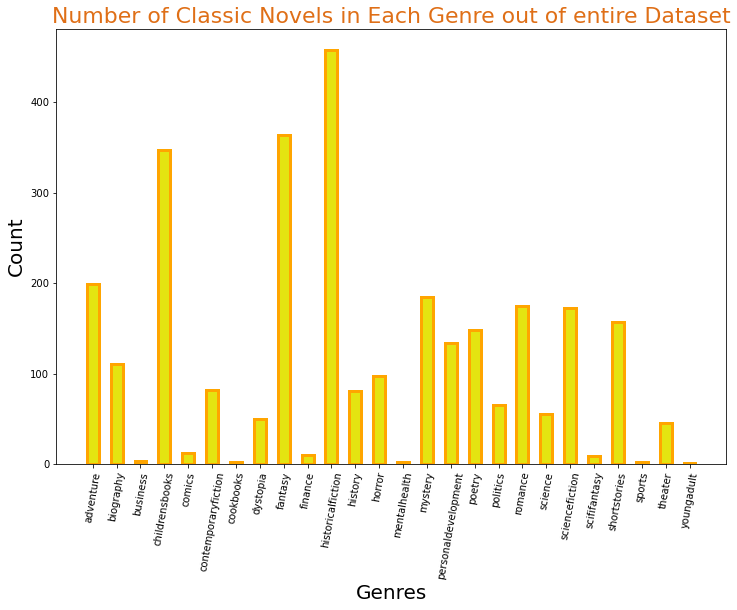

In [111]:
plt.figure(figsize = (12,8))
x = my_classics.index
height = my_classics['Count']

plt.title("Number of Classic Novels in Each Genre out of entire Dataset", fontsize = 22, color = "#DF6F17");
plt.ylabel('Count', fontsize = 20)
plt.xlabel('Genres', fontsize = 20)
plt.bar(x, height, width = 0.5, color = '#E4E411', edgecolor = "orange", linewidth = 3)
plt.xticks(rotation = '80');

In [112]:
# for example y = 0.5x, where x is the number of historicalfiction novels released in a specific year or group of years,
# and y is the number of those books that are considered classics novels 
# use linear rogistic if possible

df['Is Classic'] = [1 if 'Yes is Classic' in row else 0 for row in df['Classic or No']]
# Created a new column that has a 1 if the book is a classic, and 0 if is not


In [113]:
genre_expand_df = df.explode("Genres")
# genre_expand_df

genre_expand_df = genre_expand_df[['Genres', 'original_publication_year', 'average_rating', 'Is Classic']]

In [114]:
genre_expand_df.head()

,Genres,original_publication_year,average_rating,Is Classic
0,adventure,2008,4.34,0
0,romance,2008,4.34,0
0,dystopia,2008,4.34,0
0,sciencefiction,2008,4.34,0
1,adventure,1997,4.44,1


In [115]:
dum_type_classic = pd.get_dummies(genre_expand_df['Genres'])

new_df = pd.concat([dum_type_classic, genre_expand_df], axis=1)


In [116]:
new_df.head()

,adventure,biography,business,childrensbooks,comics,contemporaryfiction,cookbooks,dystopia,fantasy,finance,historicalfiction,history,horror,instructional,mentalhealth,mystery,personaldevelopment,poetry,politics,romance,science,sciencefiction,scififantasy,shortstories,sports,theater,youngadult,Genres,original_publication_year,average_rating,Is Classic
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,adventure,2008,4.34,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,romance,2008,4.34,0
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,dystopia,2008,4.34,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,sciencefiction,2008,4.34,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,adventure,1997,4.44,1


In [117]:
X = new_df[['historicalfiction', 'fantasy', 'adventure', 'childrensbooks', 'romance',  'original_publication_year', 'average_rating']]

In [118]:
y = new_df['Is Classic']

In [119]:
X_train , X_test , y_train , y_test =  train_test_split(X , y , test_size = 0.2 )

In [120]:
X_train.count()

historicalfiction            14967
fantasy                      14967
adventure                    14967
childrensbooks               14967
romance                      14967
original_publication_year    14967
average_rating               14967
dtype: int64

In [121]:
model_logistic = linear_model.LogisticRegression()
model_logistic.fit(X_train, y_train)

LogisticRegression()

In [122]:
y_predicted = model_logistic.predict(X_test)
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [123]:
model_logistic.score(X_test, y_test)

0.8367183324425441

In [124]:
cm = confusion_matrix(y_test, y_predicted)

In [125]:
cm

array([[3093,    8],
       [ 603,   38]], dtype=int64)

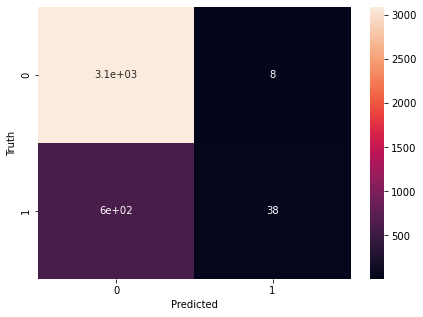

In [126]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth');

In [127]:
# 10. Finally check if there is a linear correlation between the number of ratings and the actual rating of the book?
# --- Are books that are higher rated or lower, gonna have more people rating them?

In [128]:
#df.head()

# condition_science = df['Full list'] == 'science'
# df[condition_science]['Full list'].count()


# df = df.explode("Full list")
# #sick function that will help me filter my data and properly analyze it

In [129]:
# dum_type_classic = pd.get_dummies(type_of_classic["Type of Classic"])

# new_df = pd.concat([dum_type_classic, type_of_classic], axis=1)

#X = new_df.drop(['Type of Classic', 'Count'], axis = 1)
#y = new_df["Count"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# model = linear_model.LogisticRegression()
# model.fit(X,y)

# y_predicted = model.predict(X_test)

# model.score(X_test,y_test)


df.shape

(9946, 32)